In [1]:
# Importar las Libraries necesarias para el desarrollo

# Sistema Operativo
import warnings
import re
import os
warnings.filterwarnings("ignore")
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import datetime as dt
import seaborn as sns

# Ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
# Establecer estilo visualización
sns.set_style("darkgrid")

# Establecer vista de decimales
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Cargar los datos con la ruta de archivo excel
df = pd.read_csv("data/rfm.csv")


# Vista previa
df.head()


,Unnamed: 0,customer_id,recency,monetary,ontime_avg,is_graduated_last,is_kam_last,microzona_last,birthday,last_order,frequency,R,F,M,RFM_Score,stock_seguridad,umbral_churn,churned,Segment
0,0,1,16,42.24,1.00,True,False,149.00,2021-09-17,2023-03-30,3,3,2,2,7,0.75,3.75,True,Clientes Churneados
1,1,2,1,84.17,1.00,True,False,121.00,2021-04-09,2023-05-15,9,5,3,4,12,2.25,11.25,False,Clientes Leales
2,2,3,1,63.49,0.94,True,False,120.00,2021-01-08,2023-06-27,17,5,4,3,12,4.25,21.25,False,Clientes Leales
3,3,4,5,77.52,1.00,False,False,635.00,2022-03-31,2023-08-04,13,4,4,4,12,3.25,16.25,False,Clientes Leales
4,4,5,2,157.33,0.98,False,False,347.00,2022-10-07,2023-08-24,19,4,5,5,14,4.75,23.75,False,Clientes VIP


## Eliminar columnas redundantes o innecesarias

Dado que en las reuniones se hablo de la importancia de usar las ofensas a los comercios como los indicadores y que reutilizar las etiquetas que se usaron para definir que alguien está o no en churn se proceden a eliminar algunas etiquetas del modelo de predicción.

In [2]:
# Eliminar columnas innecesarias
cols_to_drop = ['Unnamed: 0', 'customer_id', 'last_order', 'recency', 'frequency', 'monetary','R','F','M' ,'RFM_Score', 'Segment','stock_seguridad','umbral_churn']
df_clean = df.drop(columns=cols_to_drop)

# Convertir 'birthday' a edad del cliente
df_clean['birthday'] = pd.to_datetime(df_clean['birthday'])
df_clean['age'] = (datetime.now() - df_clean['birthday']).dt.days / 365.25
df_clean = df_clean.drop(columns='birthday')



### Volver microzona un dato categorico

In [3]:
# Convertir 'microzona_last' a categórica
df_clean['microzona_last'] = df_clean['microzona_last'].astype('category')

# One-Hot Encoding para 'microzona_last'
df_clean = pd.get_dummies(df_clean, columns=['microzona_last'], drop_first=True)




## Split de data

In [4]:
# Dividir nuevamente el conjunto de datos en conjuntos de entrenamiento y prueba
X = df_clean.drop(columns='churned')
y = df_clean['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,ontime_avg,is_graduated_last,is_kam_last,age,microzona_last_33.0,microzona_last_112.0,microzona_last_120.0,microzona_last_121.0,microzona_last_122.0,microzona_last_125.0,microzona_last_126.0,microzona_last_135.0,microzona_last_136.0,microzona_last_137.0,microzona_last_138.0,microzona_last_149.0,microzona_last_150.0,microzona_last_151.0,microzona_last_169.0,microzona_last_170.0,microzona_last_171.0,microzona_last_172.0,microzona_last_186.0,microzona_last_193.0,microzona_last_205.0,microzona_last_209.0,microzona_last_210.0,microzona_last_241.0,microzona_last_332.0,microzona_last_347.0,microzona_last_351.0,microzona_last_352.0,microzona_last_353.0,microzona_last_354.0,microzona_last_355.0,microzona_last_356.0,microzona_last_357.0,microzona_last_358.0,microzona_last_359.0,microzona_last_360.0,microzona_last_378.0,microzona_last_381.0,microzona_last_382.0,microzona_last_383.0,microzona_last_384.0,microzona_last_385.0,microzona_last_388.0,microzona_last_389.0,microzona_last_415.0,microzona_last_417.0,microzona_last_418.0,microzona_last_420.0,microzona_last_421.0,microzona_last_472.0,microzona_last_473.0,microzona_last_474.0,microzona_last_475.0,microzona_last_476.0,microzona_last_477.0,microzona_last_478.0,microzona_last_479.0,microzona_last_566.0,microzona_last_567.0,microzona_last_568.0,microzona_last_569.0,microzona_last_570.0,microzona_last_571.0,microzona_last_572.0,microzona_last_630.0,microzona_last_631.0,microzona_last_632.0,microzona_last_633.0,microzona_last_634.0,microzona_last_635.0,microzona_last_636.0,microzona_last_637.0,microzona_last_641.0,microzona_last_839.0,microzona_last_919.0,microzona_last_1188.0,microzona_last_1235.0,microzona_last_1252.0,microzona_last_1297.0,microzona_last_1298.0,microzona_last_1299.0,microzona_last_1335.0,microzona_last_1348.0,microzona_last_1351.0,microzona_last_1352.0,microzona_last_1368.0
5075,1.00,False,False,2.54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6021,1.00,False,False,0.79,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2984,1.00,False,False,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7657,1.00,True,False,1.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3434,0.96,True,False,1.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Pipeline para Regresión Logística
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Pipeline para Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Pipeline para SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])


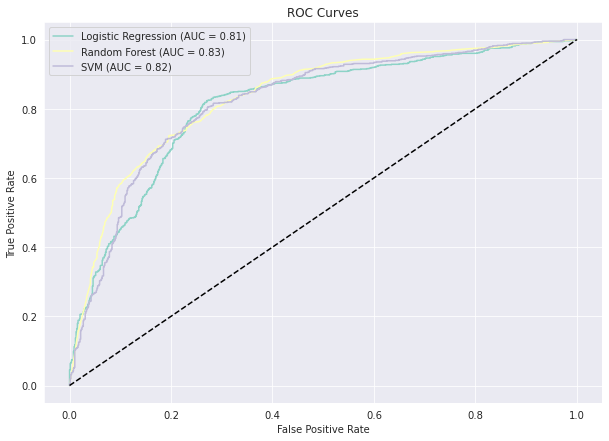

(0.8128435716403933, 0.8343267054958315, 0.821057882919404)

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Entrenar los modelos
pipeline_logreg.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)

# Obtener las probabilidades de clase positiva para cada modelo
y_prob_logreg = pipeline_logreg.predict_proba(X_test)[:,1]
y_prob_rf = pipeline_rf.predict_proba(X_test)[:,1]
y_prob_svm = pipeline_svm.predict_proba(X_test)[:,1]

# Calcular ROC-AUC para cada modelo
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plotting ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

roc_auc_logreg, roc_auc_rf, roc_auc_svm


Este resultado es cuestionable por el tipo de construcción de las etiquetas y las pocas features incorporadas. Se exploran dos opciones,
primero cambiar el enfoque e intentar una caracterización y dashboards de seguiento en lugar de un modelo de predicción del churn. En otras palabras, crear un modelo multiclase para entender la probabilidad de caer en cada uno de los otros segmentos. Segundo, usar añadir otros features para la predicción

# Modelo multiclase

Vamos a desglosar este problema en varios pasos:

- Carga: Verificar el contenido del archivo y analizar las características básicas de los datos.
- Preprocesamiento: Eliminar redundancias, tratar valores faltantes y cambiar la columna "microzone" por una categoría.
- Balanceo de datos: evaluaremos y aplicaremos técnicas de balanceo si es necesario.
- Kolmogorov-Smirnov test: Identificar y tratar posibles redundancias en los datos.
- Creación de Modelos: Crear modelos de Random Forest y XGBoost para predecir la probabilidad de que un cliente cambie de segmento.
- Evaluación de Modelos: Analizar las métricas ROC y F1 para evaluar el rendimiento de los modelos.
- Interpretación de Resultados: Explicar las predicciones y el rendimiento de los modelos.

In [7]:
# Cargamos el archivo CSV
df = pd.read_csv("data/rfm.csv")

Antes de seguir adelante, eliminaré las columnas redundantes y transformaré la columna microzona_last en una variable categórica. Me gustaría comentar que los datos muestran que tenemos cuatro segmentos de clientes:  
- Clientes Churneados: 4,352 clientes.
- Clientes en Riesgo/Zombies: 1,582 clientes.
- Clientes Leales: 1,461 clientes.
- Clientes VIP: 892 clientes.  

Como se puede observar, hay un desbalance entre las clases, especialmente entre los "Clientes Churneados" y los demás segmentos.  
Comenzaremos eliminando las columnas que no parecen aportar información relevante para la predicción del segmento.​

In [12]:
# Eliminar columnas innecesarias
columns_to_drop = ['recency', 'monetary', 'frequency', 'RFM_Score', 'stock_seguridad', 'umbral_churn', 'last_order', 'churned', 'Unnamed: 0']
df_clean = df.drop(columns=columns_to_drop)

# Convertir 'birthday' a tipo de dato fecha
df_clean['birthday'] = pd.to_datetime(df_clean['birthday'])

# Convertir 'microzona_last' a categórico
df_clean['microzona_last'] = df_clean['microzona_last'].astype('category')

# Mostrar las primeras filas del DataFrame limpio
df_clean.head()


,customer_id,ontime_avg,is_graduated_last,is_kam_last,microzona_last,birthday,R,F,M,Segment
0,1,1.00,True,False,149.00,2021-09-17,3,2,2,Clientes Churneados
1,2,1.00,True,False,121.00,2021-04-09,5,3,4,Clientes Leales
2,3,0.94,True,False,120.00,2021-01-08,5,4,3,Clientes Leales
3,4,1.00,False,False,635.00,2022-03-31,4,4,4,Clientes Leales
4,5,0.98,False,False,347.00,2022-10-07,4,5,5,Clientes VIP


## Split de datos

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir características y variable objetivo
X = df_clean.drop('Segment', axis=1)
y = df_clean['Segment']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Columnas numéricas y categóricas
numeric_features = ['ontime_avg', 'R', 'F', 'M']
categorical_features = ['is_graduated_last', 'is_kam_last', 'microzona_last']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features) #Uso handle_unknown ignore por el desbalance en microzonas o da error
    ])

# Transformar los conjuntos de entrenamiento y prueba nuevamente
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((6629, 89), (1658, 89))

Ahora, tenemos las siguientes dimensiones para nuestros conjuntos de datos:

- Conjunto de entrenamiento: 6629 registros con 89 características.
- Conjunto de prueba: 1658 registros con 89 características.  

NOTA:Usaré el parámetro class_weight="balanced" durante el entrenamiento de los modelos. Esta opción ajusta automáticamente los pesos de las clases inversamente proporcional a las frecuencias de clase.

## 

## Ramdon Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Entrenar modelo Random Forest
rf_clf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_clf.fit(X_train_transformed, y_train)

# Predecir en conjunto de prueba
rf_predictions = rf_clf.predict(X_test_transformed)

# Evaluar el modelo
rf_classification_report = classification_report(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

rf_classification_report, rf_f1



('                            precision    recall  f1-score   support\n\n       Clientes Churneados       0.96      0.98      0.97       873\n           Clientes Leales       0.96      0.99      0.97       300\n              Clientes VIP       0.99      0.98      0.99       178\nClientes en Riesgo/Zombies       0.93      0.87      0.90       307\n\n                  accuracy                           0.96      1658\n                 macro avg       0.96      0.95      0.96      1658\n              weighted avg       0.96      0.96      0.96      1658\n',
 0.9585785612910608)

El modelo Random Forest ha sido entrenado y evaluado con éxito. Aquí están las métricas de evaluación para este modelo:

Precisión global (accuracy): 96%  
F1 ponderado: 0.959

La tabla de clasificación muestra precision, recall y F1-score para cada clase en particular. El modelo muestra un buen rendimiento en todas las clases (demasiado bueno para ser cierto).

## XGBOOST

In [22]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Entrenar modelo XGBoost
xgb_clf = xgb.XGBClassifier(scale_pos_weight='balanced', random_state=42, use_label_encoder=False)
xgb_clf.fit(X_train_transformed, y_train_encoded, eval_metric='mlogloss')

# Predecir en conjunto de prueba
xgb_predictions_encoded = xgb_clf.predict(X_test_transformed)

# Convertir las predicciones codificadas de vuelta a las etiquetas originales
xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)

# Evaluar el modelo
xgb_classification_report = classification_report(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

xgb_classification_report, xgb_f1

('                            precision    recall  f1-score   support\n\n       Clientes Churneados       0.96      0.97      0.97       873\n           Clientes Leales       0.99      1.00      0.99       300\n              Clientes VIP       1.00      1.00      1.00       178\nClientes en Riesgo/Zombies       0.93      0.90      0.92       307\n\n                  accuracy                           0.97      1658\n                 macro avg       0.97      0.97      0.97      1658\n              weighted avg       0.97      0.97      0.97      1658\n',
 0.9666360048431514)

*Modelo XGBoost:*

- Clientes Churneados: El modelo tiene una precisión del 96%, lo que indica que el 96% de las veces que el modelo predice que un cliente es "Churneado", es correcto. El recall es del 97%, lo que significa que el modelo identifica correctamente el 97% de los clientes Churneados reales. El F1-score, que es una métrica que combina precisión y recall, es del 97%.

- Clientes Leales: El modelo tiene una precisión del 99%, un recall del 100% y un F1-score del 99%.

- Clientes VIP: El modelo tiene una precisión, recall y F1-score perfectos del 100%.

- Clientes en Riesgo/Zombies: La precisión es del 93%, el recall es del 90% y el F1-score es del 92%.  

La precisión global del modelo XGBoost es del 97%. Esto es 1% más alto que el modelo Random Forest, lo que indica que XGBoost realiza predicciones correctas para una fracción ligeramente mayor de los datos de prueba en comparación con Random Forest.